<div> 
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><FONT FACE="times new roman" SIZE=5>
<br>
<i><b>Docente:</b></i> Juan Ospina
<br>
<i><b>Asignatura:</b></i> Inteligencia Artificial
<br>
<i><b>Tema:</b></i> Laboratorio 4
<br>
<i><b>Estudiantes</b></i> 
  <li>Juan Esteban Arias </li>
  <li>Hugo Andres Espinosa</li>
  <li>Juan Camilo Hernandez Ibañez</li>

</FONT>
</div>

# __Laboratorio 4: Búsqueda informada (Parte 2)__

El siguiente taller de corresponde a la aplicación de algoritmos de búsqueda informada en la solución de problemas en inteligencia artificial. Para el desarrollo del laboratorio tenga en cuenta lo siguiente:

* La actividad puede realizarse en grupos de máximo 4 personas
* La solución al taller debe enviarse en un notebook a través de Moodle. Se debe adjuntar el archivo. No se aceptan enlaces
* El objetivo del taller es hacer énfasis en el proceso de modelamiento. Por esta razón se deben utilizar como base para la soluciones propuestas las clases y métodos disponibles en la sección recursos. __Otras implementaciones no serán tenidas en cuenta__.
* Si se detecta cualquier tipo de fraude, la calificación de 0.0.
* El taller deberá ser sustentando por uno de los miembros del grupo
* Las soluciones propuestas deben cumplir con las recomendaciones de código limpio especificadas en el [PEP8](https://pep8.org/), de lo contrario será penalizado

In [ ]:
import math
import heapq
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from math import sqrt

In [ ]:
class SearchProblem(object):

    def __init__(self, initial, goal=None, **kwds): 
        self.initial = initial
        self.goal = goal

        
    def actions(self, node):    
        raise NotImplementedError
        
    def result(self, node, action): 
        raise NotImplementedError
        
    def is_goal(self, node):   
        return self.goal == node
    
    def is_goal_2(self, node): 
        return self.goal.state == node
    
    def action_cost(self, s, a, s1): 
        return 1

    def h_manhattan(self, node):
     raise NotImplementedError 

    def h_mal_ubicadas(self, node):
     raise NotImplementedError  

    def h_euclidiana(self, node):
     raise NotImplementedError   
     
    def g(self, node):
     return node.path_cost()

    def f(self, node):
     return self.g(node) + self.h(node)  

In [ ]:
class Node:
    def __init__(self, state='', parent=None, action=None, cost=1):
        self.state = state
        self.parent = parent
        self.action = action
        self.cost = cost

    def states_path(self):
        if self.parent == None:
            return [self]
        return self.parent.states_path() + [self]
    
    def actions_path(self):
        if self.parent == None:
            return []
        return self.parent.actions_path() + [self.action]        

    def __eq__(self, node):
        if node:
            return self.state == node.state
        return False    

    def path_cost(self):
        total_cost = 0
        if self.parent is None:
            return total_cost
        total_cost += self.cost + self.parent.path_cost()
        return total_cost 

    def __repr__(self):
        return self.state  

## __Estructuras de datos - Cola de prioridad__

In [ ]:
class PriorityQueue:

    def  __init__(self):
        self.heap = []
        self.count = 0

    def push(self, item, priority):
        entry = (priority, self.count, item)
        heapq.heappush(self.heap, entry)
        self.count += 1

    def pop(self):
        (_, _, item) = heapq.heappop(self.heap)
        return item

    def isEmpty(self):
        return len(self.heap) == 0

    def update(self, item, priority):
        for index, (p, c, i) in enumerate(self.heap):
            if i == item:
                if p <= priority:
                    break
                del self.heap[index]
                self.heap.append((priority, c, item))
                heapq.heapify(self.heap)
                break
        else:
            self.push(item, priority)   

In [ ]:
def expand(problem, node):
    childs = []
    for action in problem.actions(node):
        childs.append(problem.result(node, action))
    return childs    

# **USC**

In [ ]:
def UCS(problem, fringe=PriorityQueue()):
    fringe.push(problem.initial, 0)
    closed = []
    while(True):
        node = fringe.pop()
        if problem.is_goal(node):
            return node, closed
        if node.state not in closed:
            closed.append(node.state)
            for child in expand(problem, node):
                fringe.push(child, problem.g(child))
       

# **VORAZ**

In [ ]:
def VORAZ(heuristica, problem, fringe=PriorityQueue()):
    if(heuristica=="malUbicadas"):
      fringe.push(problem.initial, problem.hUbicadas(problem.initial))
    if(heuristica=="manhattan"):
      fringe.push(problem.initial, problem.hManhattan(problem.initial))
    if(heuristica=="euclidiana"):
      fringe.push(problem.initial, problem.hEuclidiana(problem.initial))
    closed = []
    while(True):
        node = fringe.pop()
        if problem.is_goal(node): 
            return node,closed
        if node.state not in closed: 
            closed.append(node.state)
            for child in expand(problem, node):
              if(heuristica=="malUbicadas"):
                fringe.push(child, problem.hUbicadas(child))
              if(heuristica=="manhattan"):
                fringe.push(child, problem.hManhattan(child))
              if(heuristica=="euclidiana"):
                fringe.push(child, problem.g(child) + problem.hEuclidiana(child))

# **A***

In [ ]:
def ESTRELLA(heuristica, problem, fringe=PriorityQueue()):
    if(heuristica=="malUbicadas"):
      fringe.push(problem.initial, 0 + problem.hUbicadas(problem.initial))
    if(heuristica=="manhattan"):
      fringe.push(problem.initial, 0 + problem.hManhattan(problem.initial))
    if(heuristica=="euclidiana"):
      fringe.push(problem.initial, 0 + problem.hEuclidiana(problem.initial))
    closed = []

    while(True):
        node = fringe.pop()
        if problem.is_goal(node):
            return node, closed
        if node.state not in closed:
            closed.append(node.state)
            for child in expand(problem, node):
              if(heuristica=="malUbicadas"):
                fringe.push(child, problem.g(child) + problem.hUbicadas(child))
              if(heuristica=="manhattan"):
                fringe.push(child, problem.hManhattan(child))
              if(heuristica=="euclidiana"):
                fringe.push(child, problem.g(child) + problem.hEuclidiana(child))

## __1. (1.5 Puntos) Rompecabezas de 8-piezas__

Solucione el rompecabezas de 8 piezas suponiendo que todos los movimientos cuestan 1 punto y utilizando la configuración `[1, 0, 2, 7, 4, 3, 8, 6, 5]` como estado inicial. 
<center>

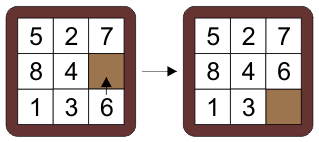
</center>
Para este caso encuentre:

* La solución utilizando UCS
* La solución con los algoritmos Voraz y A* utilizando como heurística el número de piezas mal ubicadas
* La solución con los algoritmos Voraz y A* utilizando la distancia de manhattan como heurística.
* Compare la cantidad de nodos expandidos por ambas heurísticas en el algortimo A* contra la cantidad de nodos expandidos por UCS
* Compare el costo de las soluciones obtenidas por ambas heurísticas en el algoritmo Voraz contra el costo obtenido por UCS
* Proponga una nueva heurística admisible que expanda menos nodos que manhattan. 
* Seleccione la heurística que presentó el mejor desempeño y calcule la solución para el estado inicial `[1, 4, 2, 0, 7, 5, 3, 6, 8]` utilizando A*. Compare la cantidad de nodos exapndidos con UCS para este estado inicial
* __NOTA:__ La ejecución de UCS para el estado inicial `[1, 4, 2, 0, 7, 5, 3, 6, 8]` puede tomar aproximadamente 60 minutos si se realiza en colab. Se sugiere ejecutarlo local (o tener paciencia)

In [ ]:

cont = 1

heuristicE = {}

def hallarDistanacia(x, y):
  lista = []
  for xMatriz in range(3):
    for yMatriz in range(3):
      lista.append(round(math.sqrt((xActual-xMatriz)**2+(yActual-yMatriz)**2),2))
      if(xMatriz==2 and yMatriz==2):
        return lista;
        lista = []

for xActual in range(3):
  for yActual in range(3):
    heuristicE[cont]=hallarDistanacia(xActual, yActual)
    cont = cont + 1
    if(cont+0.5>=9):
      cont = 0

heuristicE

{1: [0.0, 1.0, 2.0, 1.0, 1.41, 2.24, 2.0, 2.24, 2.83],
 2: [1.0, 0.0, 1.0, 1.41, 1.0, 1.41, 2.24, 2.0, 2.24],
 3: [2.0, 1.0, 0.0, 2.24, 1.41, 1.0, 2.83, 2.24, 2.0],
 4: [1.0, 1.41, 2.24, 0.0, 1.0, 2.0, 1.0, 1.41, 2.24],
 5: [1.41, 1.0, 1.41, 1.0, 0.0, 1.0, 1.41, 1.0, 1.41],
 6: [2.24, 1.41, 1.0, 2.0, 1.0, 0.0, 2.24, 1.41, 1.0],
 7: [2.0, 2.24, 2.83, 1.0, 1.41, 2.24, 0.0, 1.0, 2.0],
 8: [2.24, 2.0, 2.24, 1.41, 1.0, 1.41, 1.0, 0.0, 1.0],
 0: [2.83, 2.24, 2.0, 2.24, 1.41, 1.0, 2.0, 1.0, 0.0]}

In [ ]:
class SimpleNode(Node):
  'A simple graph example'
  def __repr__(self):
      return (3 * '|{}|{}|{}|\n').format(*self.state).replace('0','-')

class GrafoSimple (SearchProblem):
  def actions(self, node):
      actions={
          0: ('R', 'D'),
          1: ('D', 'L', 'R'),
          2: ('L', 'D'),
          3: ('D', 'U', 'R'),
          4: ('D', 'U', 'L', 'R'),
          5: ('D', 'U', 'L'),
          6: ('U', 'R'),
          7: ('U', 'L', 'R'),
          8: ('U', 'L')
      }
      return actions[node.state.index(0)]

  def result(self, node, action):
    blank = node.state.index(0)
    new_state = node.state.copy()
    if action == 'U':
      new_state[blank], new_state[blank - 3]  = new_state[blank - 3], new_state[blank] 
      return SimpleNode(new_state, node, 'U')

    if action == 'L':
      new_state[blank], new_state[blank - 1]  = new_state[blank - 1], new_state[blank] 
      return SimpleNode(new_state, node, 'L')

    if action == 'D':
      new_state[blank], new_state[blank + 3]  = new_state[blank + 3], new_state[blank] 
      return SimpleNode(new_state, node, 'D')

    if action == 'R':
      new_state[blank], new_state[blank + 1]  = new_state[blank + 1], new_state[blank] 
      return SimpleNode(new_state, node, 'R')

  def action_cost(self, node, action, succesor):
    cost = {
        ('A', 'B'): 2,
        ('A', 'E'): 4,
        ('A', 'D'): 2,
        ('B', 'C'): 5,
        ('B', 'E'): 1,
        ('E', 'G'): 2,
        ('D', 'G'): 7,
        ('C', 'G'): 2}
    return cost[(node.state, succesor.state)]
  
  def hUbicadas(self, node):
        costo_aproximado = 0
        for i in range(8):
            if(node.state.index(i+1) != (i)):
                costo_aproximado += 1
            if(node.state.index(0) != 8):
                costo_aproximado += 1
        return costo_aproximado

  def hManhattan(self, node):
        heuristic = {
             0: [4,0,1,2,1,2,3,2,3],
             1: [3,1,0,2,1,2,3,2,3],
             2: [2,2,1,0,3,2,1,4,3],
             3: [3,1,2,3,0,1,2,1,2],
             4: [2,2,1,2,1,0,1,2,1],
             5: [1,3,2,1,2,1,0,3,2],
             6: [2,2,3,4,1,2,3,0,1],
             7: [1,3,2,3,2,1,2,1,0],
             8: [0,4,3,2,3,2,1,2,1] 
      }
        return (heuristic[node.state.index(0)][0] +
                heuristic[node.state.index(1)][1] +
                heuristic[node.state.index(2)][2] +
                heuristic[node.state.index(3)][3] +
                heuristic[node.state.index(4)][4] +
                heuristic[node.state.index(5)][5] +
                heuristic[node.state.index(6)][6] +
                heuristic[node.state.index(7)][7] +
                heuristic[node.state.index(8)][8])
  
  def hEuclidiana(self, node):
    return (heuristicE[node.state.index(1)][1] +
                heuristicE[node.state.index(2)][2] +
                heuristicE[node.state.index(3)][3] +
                heuristicE[node.state.index(4)][4] +
                heuristicE[node.state.index(5)][5] +
                heuristicE[node.state.index(6)][6] +
                heuristicE[node.state.index(7)][7] +
                heuristicE[node.state.index(8)][8])     

**Solución a través de UCS**

**Estado incial:** [1, 0, 2, 7, 4, 3, 8, 6, 5]

In [ ]:
eightPuzzle = GrafoSimple(SimpleNode([1, 0, 2, 7, 4, 3, 8, 6, 5]), SimpleNode([1, 2, 3, 4, 5, 6, 7, 8, 0]))

solutionU, expandNodesU = UCS(eightPuzzle , fringe=PriorityQueue())

print('Sequencia:',solutionU.actions_path())
print('Nodos expandidos:', len(expandNodesU))
print('Costo:',eightPuzzle.g(solutionU))

Sequencia: ['R', 'D', 'D', 'L', 'L', 'U', 'R', 'R', 'D']
Nodos expandidos: 459
Costo: 9


**Solución a través de UCS**

**Estado incial:** [1, 4, 2, 0, 7, 5, 3, 6, 8]

In [ ]:
eightPuzzle = GrafoSimple(SimpleNode([4, 1, 2, 0, 3, 5, 7, 6, 8]), SimpleNode([1, 2, 3, 4, 5, 6, 7, 8, 0]))
solution, expandNodes = UCS(eightPuzzle , fringe=PriorityQueue())

print('Sequencia:',solution.actions_path())
print('Nodos expandidos:', len(expandNodes))
print('Costo:',eightPuzzle.g(solution))

Sequencia: ['D', 'R', 'R', 'U', 'L', 'D', 'L', 'U', 'U', 'R', 'R', 'D', 'D', 'L', 'U', 'R', 'D']
Nodos expandidos: 14365
Costo: 17


**Voraz y A* utilizando como heurística el número de piezas mal ubicadas**



In [ ]:
#Algoritmo A*
eightPuzzle = GrafoSimple(SimpleNode([1, 0, 2, 7, 4, 3, 8, 6, 5]), SimpleNode([1, 2, 3, 4, 5, 6, 7, 8, 0]))
solutionA, expandNodesA = ESTRELLA("malUbicadas", eightPuzzle, fringe=PriorityQueue())

print('Sequencia:',solutionA.actions_path())
print('Nodos expandidos:', len(expandNodesA))
print('Costo:',eightPuzzle.g(solutionA))

Sequencia: ['R', 'D', 'D', 'L', 'L', 'U', 'R', 'R', 'D']
Nodos expandidos: 24
Costo: 9


In [ ]:
#Algoritmo Voraz
eightPuzzle = GrafoSimple(SimpleNode([1, 0, 2, 7, 4, 3, 8, 6, 5]), SimpleNode([1, 2, 3, 4, 5, 6, 7, 8, 0]))
solutionV, expandNodesV = VORAZ("malUbicadas",eightPuzzle, fringe=PriorityQueue())

print('Sequencia:',solutionV.actions_path())
print('Nodos expandidos:', len(expandNodesV))
print('Costo:',eightPuzzle.g(solutionV))

Sequencia: ['R', 'D', 'D', 'L', 'L', 'U', 'R', 'R', 'D']
Nodos expandidos: 10
Costo: 9


**Algoritmos Voraz y A* utilizando la distancia de manhattan como heurística.**

In [ ]:
#Algoritmo A*
eightPuzzle = GrafoSimple(SimpleNode([1, 0, 2, 7, 4, 3, 8, 6, 5]), SimpleNode([1, 2, 3, 4, 5, 6, 7, 8, 0]))
solutionAM, expandNodesAM = ESTRELLA("manhattan", eightPuzzle, fringe=PriorityQueue())

print('Sequencia:',solutionAM.actions_path())
print('Nodos expandidos:', len(expandNodesAM))
print('Costo:',eightPuzzle.g(solutionAM))

Sequencia: ['R', 'D', 'D', 'L', 'L', 'U', 'R', 'R', 'D']
Nodos expandidos: 9
Costo: 9


In [ ]:
#Algoritmo Voraz
eightPuzzle = GrafoSimple(SimpleNode([1, 0, 2, 7, 4, 3, 8, 6, 5]), SimpleNode([1, 2, 3, 4, 5, 6, 7, 8, 0]))
solutionVM, expandNodesVM = VORAZ("manhattan",eightPuzzle, fringe=PriorityQueue())

print('Sequencia:',solutionVM.actions_path())
print('Nodos expandidos:', len(expandNodesVM))
print('Costo:',eightPuzzle.g(solutionVM))

Sequencia: ['R', 'D', 'D', 'L', 'L', 'U', 'R', 'R', 'D']
Nodos expandidos: 9
Costo: 9


**Cantidad de nodos expandidos en el algortimo A* contra la cantidad de nodos expandidos por UCS**

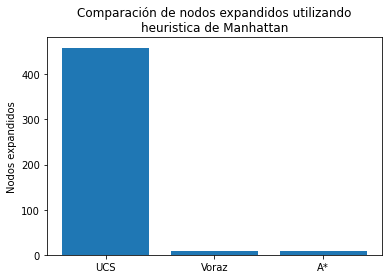

In [ ]:
iteraciones = [len(expandNodesU),len(expandNodesVM),len(expandNodesAM)]
plt.ylabel("Nodos expandidos")
plt.bar(["UCS","Voraz","A*"],iteraciones)
plt.title("Comparación de nodos expandidos utilizando\nheuristica de Manhattan")
plt.show()

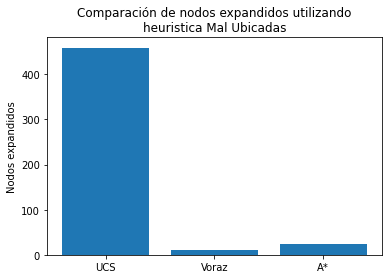

In [ ]:
iteraciones = [len(expandNodesU),len(expandNodesV),len(expandNodesA)]
plt.ylabel("Nodos expandidos")
plt.bar(["UCS","Voraz","A*"],iteraciones)
plt.title("Comparación de nodos expandidos utilizando\nheuristica Mal Ubicadas")
plt.show()

**Costo en el algortimo Voraz contra UCS**

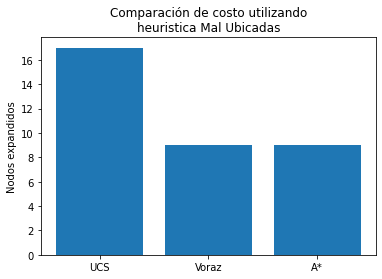

In [ ]:
iteraciones = [eightPuzzle.g(solution),eightPuzzle.g(solutionV),eightPuzzle.g(solutionA)]
plt.ylabel("Nodos expandidos")
plt.bar(["UCS","Voraz","A*"],iteraciones)
plt.title("Comparación de costo utilizando\nheuristica Mal Ubicadas")
plt.show()


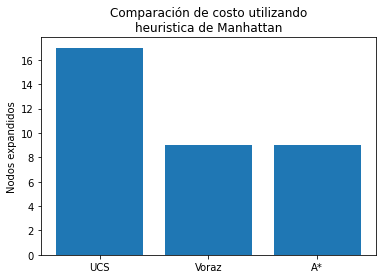

In [ ]:
iteraciones = [eightPuzzle.g(solution),eightPuzzle.g(solutionVM),eightPuzzle.g(solutionAM)]
plt.ylabel("Nodos expandidos")
plt.bar(["UCS","Voraz","A*"],iteraciones)
plt.title("Comparación de costo utilizando\nheuristica de Manhattan")
plt.show()

**Proponga una nueva heurística admisible que expanda menos nodos que manhattan.**

In [ ]:
eightPuzzle = GrafoSimple(SimpleNode([1, 0, 2, 7, 4, 3, 8, 6, 5]), SimpleNode([1, 2, 3, 4, 5, 6, 7, 8, 0]))
solutionAE, expandNodesAE = ESTRELLA("euclidiana", eightPuzzle, fringe=PriorityQueue())

print('Sequencia:',solutionAE.actions_path())
print('Nodos expandidos:', len(expandNodesAE))
print('Costo:',eightPuzzle.g(solutionAE))

Sequencia: ['R', 'D', 'D', 'L', 'L', 'U', 'R', 'R', 'D']
Nodos expandidos: 1932
Costo: 9


In [ ]:
eightPuzzle = GrafoSimple(SimpleNode([1, 0, 2, 7, 4, 3, 8, 6, 5]), SimpleNode([1, 2, 3, 4, 5, 6, 7, 8, 0]))
solutionVE, expandNodesVE = VORAZ("euclidiana", eightPuzzle, fringe=PriorityQueue())

print('Sequencia:',solutionVE.actions_path())
print('Nodos expandidos:', len(expandNodesVE))
print('Costo:',eightPuzzle.g(solutionVE))

Sequencia: ['R', 'D', 'D', 'L', 'L', 'U', 'R', 'R', 'D']
Nodos expandidos: 1932
Costo: 9


**Seleccione la heurística que presentó el mejor desempeño y calcule la solución para el estado inicial utilizando A*. Compare la cantidad de nodos exapndidos con UCS para este estado inicial**

In [ ]:
#Algoritmo A*
eightPuzzle = GrafoSimple(SimpleNode([1, 4, 2, 0, 7, 5, 3, 6, 8]), SimpleNode([1, 2, 3, 4, 5, 6, 7, 8, 0]))
solutionAM, expandNodesAM = ESTRELLA("manhattan", eightPuzzle, fringe=PriorityQueue())

print('Sequencia:',solutionAM.actions_path())
print('Nodos expandidos:', len(expandNodesAM))
print('Costo:',eightPuzzle.g(solutionAM))

Sequencia: ['R', 'D', 'L', 'U', 'R', 'D', 'R', 'U', 'L', 'U', 'R', 'D', 'L', 'L', 'D', 'R', 'R', 'U', 'L', 'D', 'R', 'U', 'L', 'D', 'L', 'U', 'R', 'R', 'D']
Nodos expandidos: 204
Costo: 29


## __3. (1.5 Puntos) Un laberinto__

Considere el problema de navegar en un laberinto que puede representarse como un arreglo bidimensional. En el laberinto existen algunas celdas que se consideran obstáculos y no es posible atravesarlas. Un agente que se encuentra en el laberinto puede moverse a cualquiera de las 8 celdas adyacentes siempre que la celda no sea un obstáculo y no esté por fuera de los límites del laberinto. En este caso, podemos representar la posición del agente como una coordenada $(x, y)$. Por ejemplo, la coordenada $(4,2$). Adicionalmente, las acciones pueden representarse como conjunto de parejas $(dx, dy)$ en el cual $dx$ representa la variación de la posición en $x$ y $dy$ representa la variación de la posición en $y$. Por ejemplo, $(0,-1)$ representa dejar la coordenada x tal como está y disminuir la actual coordenada en $y$ en una unidad. A continuación, se presenta el laberito en que se encuentra el agente:

<center>

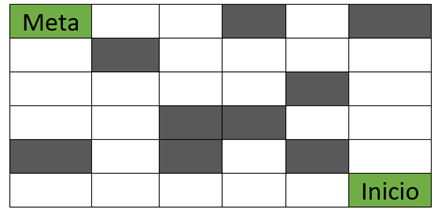

</center>
Para este problema:

* Modele este problema como un problema de búsqueda
* Implemente los algoritmos de búsquea UCS, Voraz y A* utilizando la distancia euclidiana como heurística y suponiendo que todos los movimientos cuestan 1 unidad.
* Compare la cantidad de nodos expandidos por UCS, Voraz y A*
* Construya una visualización para el laberinto, los obstaculos y la ruta encontrada. __Sugerencia__: Una forma de lograr esto es utilizar un mapa de calor.
 

             SE ESTABLECE EL SIGUIENTE TABLERO
              
                      0  1  1  1  1  2
                      3  4  4  4  4  5
                      3  4  4  4  4  5
                      3  4  4  4  4  5
                      3  4  4  4  4  5
                      6  7  7  7  7  8

    Cada numero representa un conjunto diferente de acciones
                  posibles en la casilla.

In [ ]:
class Node:
    def __init__(self, state='', parent=None, action=None, cost=1, road = [0]*36):
        self.state = state
        self.parent = parent
        self.action = action
        self.cost = cost
        self.road  = road

    def states_path(self):
        if self.parent == None:
            self.road[self.state.index(2)] = 5
            return [self]
        self.road[self.parent.state.index(2)] = 5
        self.road[self.state.index(2)] = 5
        return self.parent.states_path() + [self]
     
    def actions_path(self):
        if self.parent == None:
            return []
        return self.parent.actions_path() + [self.action]        

    def __eq__(self, node):
       if node:
           return self.state == node.state
       return False    

    def path_cost(self):
        total_cost = 0
        if self.parent is None:
            return total_cost
        total_cost += self.cost + self.parent.path_cost()
        return total_cost 

    def __repr__(self):
       return self.state  

In [ ]:
heuristicE = list()
for i in range(6):
    for j in range(6):
        heuristicE.append(round(sqrt((j ** 2) + (i ** 2)), 2))

In [ ]:
class Board(Node):
    def __repr__(self):
        return (6 * '|{}|{}|{}|{}|{}|{}|\n').format(*self.state).replace('0', '-')

class EightPuzzle(SearchProblem):
    def actions(self, node):
        moves = {0: ('D', 'R'),
                 1: ('D', 'L', 'R'),
                 2: ('D', 'L'),
                 3: ('D', 'U', 'R'),
                 4: ('D', 'U', 'L', 'R'),
                 5: ('D', 'U', 'L'),
                 6: ('U', 'R'),
                 7: ('U', 'L', 'R'),
                 8: ('U', 'L')}

        lateralDerecha = [11,17,23,29]
        lateralIzquierda = [6,12,18,24]
        centro = [7,8,9,10,13,14,15,16,19,20,21,22,25,26,27,28]
        
        #print("Posicion",node.state.index(2))
        if node.state.index(2)==0: #Esquina superior izquierda
           return moves[0]
        elif node.state.index(2)>=1 and node.state.index(2)<=4: #Barra superior
           return moves[1]
        elif node.state.index(2)==5: #Esquina superior derecha
           return moves[2]
        elif node.state.index(2) in lateralIzquierda: #Barra lateral izquierda
          return moves[3]
        elif node.state.index(2) in centro:
           return moves[4]
        elif node.state.index(2) in lateralDerecha:
           return moves[5]
        elif node.state.index(2)==30: # Esquina inferior izquierda
          return moves[6]
        elif node.state.index(2)>=31 and node.state.index(2)<=34: # barra inferior
           return moves[7]
        elif node.state.index(2)==35: # Esquina inferior derecha
          return moves[8]

    def result(self, node, action):
        agente = node.state.index(2)

        new_state = node.state.copy()
        if action == 'U':
            if(new_state[agente - 6] != 1):
                new_state[agente], new_state[agente - 6] = new_state[agente - 6], new_state[agente]
                return Board(new_state, node, 'U')

        elif action == 'L':
            if(new_state[agente - 1] != 1):
                new_state[agente], new_state[agente - 1] = new_state[agente - 1], new_state[agente]
                return Board(new_state, node, 'L')

        elif action == 'D':
            if(new_state[agente + 6] != 1):
                new_state[agente], new_state[agente + 6] = new_state[agente + 6], new_state[agente]
                return Board(new_state, node, 'D')

        elif action == 'R':
            if(new_state[agente + 1] != 1):
                new_state[agente], new_state[agente + 1] = new_state[agente + 1], new_state[agente]
                return Board(new_state, node, 'R')

        return Board(new_state, node, action)

    def h(self, node):
        return (heuristicE[node.state.index(2)])

In [ ]:
caminoUCS = [0]*36
def laberintoUCS(problem):
    fringe = PriorityQueue()
    closed = []
    fringe.push(problem.initial, 0)

    while(True):
        node = fringe.pop()
        if problem.is_goal_2(node.state):
            caminoUCS[node.state.index(2)] = 5
            return node, closed
        if node.state not in closed:
            closed.append(node.state)
            caminoUCS[node.state.index(2)] = 5
            for child in expand(problem, node):
                fringe.push(child, problem.g(child))

In [ ]:
caminoVoraz = [0 for i in range(36)]
def laberintoVORAZ (problem):
    fringe = PriorityQueue()
    fringe.push(problem.initial, 0 + problem.h(problem.initial))
    closed = []
    while(True):
        node = fringe.pop()
        if problem.is_goal_2(node.state):
            caminoVoraz[node.state.index(2)] = 5
            return node, closed
        if node.state not in closed:
            closed.append(node.state)
            caminoVoraz[node.state.index(2)] = 5
            for child in expand(problem, node):
                 fringe.push(child, problem.g(child) + problem.h(child))

In [ ]:
caminoEstrella = [0]*36
def laberintoESTRELLA(problem):
    fringe = PriorityQueue()
    fringe.push(problem.initial, 0 + problem.h(problem.initial))
    closed = []

    while(True):
        node = fringe.pop()
        if problem.is_goal_2(node.state):
            caminoEstrella[node.state.index(2)] = 5
            return node, closed
        if node.state not in closed:
            closed.append(node.state)
            caminoEstrella[node.state.index(2)] = 5
            for child in expand(problem, node):
                fringe.push(child, problem.g(child) + problem.h(child))

In [ ]:
eightPuzzle = EightPuzzle(Board([0, 0, 0, 1, 0, 1,
                                 0, 1, 0, 0, 0, 0,
                                 0, 0, 0, 0, 1, 0,
                                 0, 0, 1, 1, 0, 0,
                                 1, 0, 1, 0, 1, 0,
                                 0, 0, 0, 0, 0, 2]),
                          Board([2, 0, 0, 1, 0, 1,
                                 0, 1, 0, 0, 0, 0,
                                 0, 0, 0, 0, 1, 0,
                                 0, 0, 1, 1, 0, 0,
                                 1, 0, 1, 0, 1, 0,
                                 0, 0, 0, 0, 0, 0]))

In [ ]:
solutionUCS, nodosUCS = laberintoUCS(eightPuzzle)
print('Sequencia:', solution.actions_path())
print('Nodos expandidos:', len(nodosUCS))
print('Costo:', eightPuzzle.g(solutionUCS))
for board in solutionUCS.states_path():
    pass

Sequencia: ['D', 'R', 'R', 'U', 'L', 'D', 'L', 'U', 'U', 'R', 'R', 'D', 'D', 'L', 'U', 'R', 'D']
Nodos expandidos: 26
Costo: 10


In [ ]:
solutionV, nodosVORAZ = laberintoVORAZ(eightPuzzle)
print('Sequencia:', solutionV.actions_path())
print('Nodos expandidos:', len(nodosVORAZ))
print('Costo:', eightPuzzle.g(solutionV))
for board in solutionV.states_path():
    pass

Sequencia: ['U', 'U', 'U', 'U', 'L', 'L', 'L', 'U', 'L', 'L']
Nodos expandidos: 24
Costo: 10


In [ ]:
solutionE, nodosEstrella = laberintoESTRELLA(eightPuzzle)
print('Sequencia:', solutionE.actions_path())
print('Nodos expandidos:', len(nodosEstrella))
print('Costo:', eightPuzzle.g(solutionE))
for board in solutionE.states_path():
    pass

Sequencia: ['U', 'U', 'U', 'U', 'L', 'L', 'L', 'U', 'L', 'L']
Nodos expandidos: 24
Costo: 10


**Comparación**

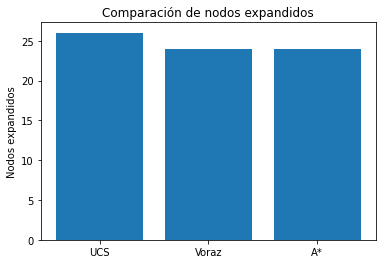

In [ ]:
iteraciones = [len(nodosUCS), len(nodosVORAZ), len(nodosEstrella)]
plt.ylabel("Nodos expandidos")
plt.bar(["UCS","Voraz","A*"],iteraciones)
plt.title("Comparación de nodos expandidos")
plt.show()

**Graficos**

In [ ]:
rutaEncontradaU = solutionUCS.road.copy()
rutaEncontradaV = solutionV.road.copy()
rutaEncontradaE = solutionE.road.copy()
for i in range(36):
  if(caminoUCS[i]!=rutaEncontradaU[i]):
    if(caminoUCS[i]==5):
      rutaEncontradaU[i]=10
  if(caminoVoraz[i]!=rutaEncontradaV[i]):
    if(caminoVoraz[i]==5):
      rutaEncontradaV[i]=10
  if(caminoEstrella[i]!=rutaEncontradaE[i]):
    if(caminoEstrella[i]==5):
      rutaEncontradaE[i]=10
print(rutaEncontradaU)
print(rutaEncontradaV)
print(rutaEncontradaE)

[5, 5, 5, 0, 10, 0, 10, 0, 5, 5, 5, 5, 10, 10, 10, 10, 0, 5, 10, 10, 0, 0, 10, 5, 0, 10, 0, 10, 0, 5, 10, 10, 10, 10, 10, 5]
[5, 5, 5, 0, 10, 0, 10, 0, 5, 5, 5, 5, 10, 10, 0, 0, 0, 5, 10, 10, 0, 0, 10, 5, 0, 10, 0, 10, 0, 5, 10, 10, 10, 10, 10, 5]
[5, 5, 5, 0, 10, 0, 10, 0, 5, 5, 5, 5, 10, 10, 0, 0, 0, 5, 10, 10, 0, 0, 10, 5, 0, 10, 0, 10, 0, 5, 10, 10, 10, 10, 10, 5]


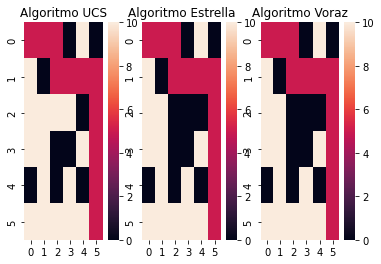

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3)
plt.rcParams["figure.figsize"] = [20,5]
ax1.set_title("Algoritmo UCS")
sns.heatmap(pd.DataFrame(np.array(rutaEncontradaU).reshape(6,6)),ax=ax1)
ax2.set_title("Algoritmo Estrella")
sns.heatmap(pd.DataFrame(np.array(rutaEncontradaE).reshape(6,6)),ax=ax2)
ax3.set_title("Algoritmo Voraz")
sns.heatmap(pd.DataFrame(np.array(rutaEncontradaV).reshape(6,6)),ax=ax3)
plt.show()

## __3. (2.0 puntos) Un generador de laberintos__

Generalice el problema anterior para dar al usuario la habilidad de configurar:

* El tamaño del laberinto
* El porcentaje de obstaculos en el tablero. A partir de ese valor los obstaculos se deben ubicar de manera aleatoria en las celdas disponibles.
* La ubicación inicial del agente

Para este problema:

* Modele este problema como un problema de búsqueda
* Implemente los algoritmos de búsquea UCS, Voraz y A* utilizando la distancia euclidiana como heurística y suponiendo que todos los movimientos cuestan 1 unidad.
* Compare la cantidad de nodos expandidos por UCS, Voraz y A*
* Construya una visualización para el laberinto, los obstaculos y la ruta encontrada. __Sugerencia__: Una forma de lograr esto de manera sencilla es utilizar un mapa de calor.
 

In [ ]:
n_filas = int(input("Ingrese la cantidad de filas: "))
n_columnas = int(input("Ingrese la cantidad de columnas: "))

Ingrese la cantidad de filas: 40
Ingrese la cantidad de columnas: 40


In [ ]:
class Nodo:
    
    def __init__(self, state='', parent=None, action=None, cost=1,recorrido = [0 for i in range(n_filas*n_columnas)]):
        self.state = state
        self.parent = parent
        self.action = action
        self.cost = cost
        self.recorrido  = recorrido

    def states_path(self):
        if self.parent == None:
            self.recorrido[self.state.index(2)] = 20
            return [self]
        self.recorrido[self.parent.state.index(2)] = 20
        self.recorrido[self.state.index(2)] = 20
        return self.parent.states_path() + [self]    
    
    def actions_path(self):
        if self.parent == None:
            return []
        return self.parent.actions_path() + [self.action]   

    def reiniciar_recorrido(self):
          self.recorrido =  [0 for i in range(n_filas*n_columnas)]          

    def __eq__(self, node):
       if node:
           return self.state == node.state
       return False    

    def path_cost(self):
        total_cost = 0
        if self.parent is None:
            return total_cost
        total_cost += self.cost + self.parent.path_cost()
        return total_cost 

    def __repr__(self):
       return self.state  

In [ ]:
laberinto = list()
for i in range(n_filas):
  for j in range(n_columnas):
    laberinto.append(0)
laberinto = np.array(laberinto).reshape(n_filas,n_columnas)

In [ ]:
obstaculos = int(input("Porcentaje de obstaculos (%): "))
n_obstaculos = math.trunc(obstaculos*(laberinto.shape[0]*laberinto.shape[1])/100)

Porcentaje de obstaculos (%): 30


In [ ]:
def posicionAgente():
  while(True):
    agente_y = int(input("Ingrese la fila del agente: "))
    agente_x = int(input("Ingrese la columna del agente: "))
    if((agente_x >= 0  and agente_x < n_columnas) and (agente_y >=0 and agente_y < n_filas)):
      return agente_x,agente_y

def posicionMeta():
  while(True):
    meta_y = int(input("Ingrese la fila de la meta: "))
    meta_x = int(input("Ingrese la columna de la meta: "))
    if((meta_x >= 0  and meta_x < n_columnas) and (meta_y >=0 and meta_y < n_filas) and (agente_x!=meta_x and agente_y!=meta_y)):
      return meta_x,meta_y

def generarObstaculos():  
  obstaculos=[]
  cantidadObstaculos = 0
  laberinto_ = laberinto.ravel().tolist()
  while(True):
        posicionCasilla = random.randint(0,(n_filas*n_columnas)-1)
        numeroAleatorio = random.randint(0,1)
        if((posicionCasilla==laberinto_.index(2)) or (posicionCasilla==laberinto_.index(3))):
          pass
        elif(numeroAleatorio==0):
          laberinto_[posicionCasilla]=0
        elif((numeroAleatorio==1) and cantidadObstaculos<n_obstaculos):
          laberinto_[posicionCasilla]=1 
          cantidadObstaculos = cantidadObstaculos + 1
        if(cantidadObstaculos==n_obstaculos):
          return laberinto_

def expand(problem, node):
    childs = []
    for action in problem.actions(node):
        childs.append(problem.result(node, action))
    return childs    

def disEuclidiana():
  distanciaEuclidiana = list()
  for i in range(n_filas):
    for j in range(n_columnas):
      distanciaEuclidiana.append(round(sqrt((j**2)+(i**2)),2))   
  return distanciaEuclidiana 

In [ ]:
agente_x, agente_y = posicionAgente()
meta_x, meta_y = posicionMeta()

laberinto[(agente_y, agente_x)]=2
laberinto[(meta_y,meta_x)]=3

laberinto = generarObstaculos()
laberinto = np.array(laberinto).reshape(n_filas,n_columnas)

estadoInicial = laberinto.copy()
estadoFinal = laberinto.copy()

for i in range(n_filas):
  for j in range(n_columnas):
    if(estadoInicial [(i,j)]==3):
       estadoInicial [(i,j)]=0

for i in range(n_filas):
  for j in range(n_columnas):
    if(estadoFinal [(i,j)]==2):
       estadoFinal [(i,j)]= 0 
    if(estadoFinal [(i,j)]==3):
       estadoFinal [(i,j)]= 2

estadoInicial = estadoInicial.ravel().tolist()
estadoFinal = estadoFinal.ravel().tolist()

Ingrese la fila del agente: 0
Ingrese la columna del agente: 0
Ingrese la fila de la meta: 39
Ingrese la columna de la meta: 39


#**Algoritmo UCS**

In [ ]:
distanciaEuclidiana = disEuclidiana();

In [ ]:
def movements():
  movientos = list()
  for i in range(n_filas):
    for j in range(n_columnas):
      if i == 0:
        if j == 0:
          movientos.append(["D", "R"])
  
        elif j == n_columnas-1:
          movientos.append(["D", "L"])        

        else: 
          movientos.append(["D", "L", "R"])
          
      elif i == n_filas-1:
        if j == 0:
          movientos.append(["U", "R"])
        
        elif j == n_columnas-1:
          movientos.append(["U", "L"])

        else: 
          movientos.append(["U", "L", "R"])
          
      elif (j == 0 and (i > 0 and i < n_filas-1 )):
        movientos.append(["D", "U", "R"])      

      elif (j == n_columnas-1 and (i > 0 and i < n_filas-1 )):
        movientos.append(["D", "U", "L"])

      elif (i > 0 and i < n_filas-1) and (j > 0 and j < n_columnas-1):
        movientos.append(["D", "U", "L", "R"])
        
  return movientos

In [ ]:
class Tablero(Nodo):
  def __repr__(self):
      columnas_str = n_columnas*"|{}"
      columnas_str= columnas_str+"|\n"
      return (n_filas * str(columnas_str)).format(*self.state).replace('0','-')

class LaberintoRecorrido(SearchProblem):
  def actions(self, node):
    movientos = movements()
    return movientos[node.state.index(2)]                          
      
  def result(self, node, action):
    agente = node.state.index(2)
    
    new_state = node.state.copy()
    if action == 'U':
      if(new_state[agente - n_columnas]!=1):
        new_state[agente], new_state[agente - n_columnas]  = new_state[agente - n_columnas], new_state[agente]
        return Tablero(new_state, node, 'U')  

    elif action == 'L':
       if(new_state[agente - 1]!=1):
        new_state[agente], new_state[agente - 1]  = new_state[agente - 1], new_state[agente] 
        return Tablero(new_state, node, 'L')

    elif action == 'D':
       if(new_state[agente + n_columnas]!=1):
        new_state[agente], new_state[agente + n_columnas]  = new_state[agente+ n_columnas], new_state[agente] 
        return Tablero(new_state, node, 'D')

    elif action == 'R':
       if(new_state[agente + 1]!=1):
        new_state[agente], new_state[agente + 1]  = new_state[agente + 1], new_state[agente] 
        return Tablero(new_state, node, 'R')
    
    return Tablero(new_state,node,action)

  def h(self, node):      
    return (distanciaEuclidiana[node.state.index(2)])

In [ ]:
caminoUcs = [0 for i in range(n_filas*n_columnas)]
def UCS(problem, fringe=PriorityQueue()):
    closed = []
    fringe.push(problem.initial, 0)

    while(True):
        node = fringe.pop()
        if problem.is_goal_2(node.state):
            caminoUcs[node.state.index(2)]=20
            return node,closed
        if node.state not in closed: 
            closed.append(node.state)
            caminoUcs[node.state.index(2)]=20
            for child in expand(problem, node):
                fringe.push(child, problem.g(child))       

In [ ]:
laberinto_recorrido = LaberintoRecorrido(Tablero(estadoInicial),Tablero(estadoFinal))
nodosExpandidosUCS=[]                                 
try:
  solution, nodosExpandidosUCS = UCS(laberinto_recorrido)
  print("---------- Algoritmo UCS ----------")
  print('Action sequence:', solution.actions_path())
  print('Cost:',laberinto_recorrido.g(solution)) 
  print("Total de Nodos Expandidos",len(nodosExpandidosUCS))
  for tablero in solution.states_path():
    pass
except:
  print("Sin solucion")

---------- Algoritmo UCS ----------
Action sequence: ['D', 'D', 'D', 'D', 'R', 'R', 'D', 'R', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'R', 'D', 'R', 'R', 'D', 'D', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D', 'D', 'D', 'R', 'D', 'D', 'D', 'D', 'R', 'D', 'D', 'R', 'R', 'R', 'R', 'R', 'D', 'R', 'D', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D', 'D', 'D', 'R', 'R', 'R', 'D', 'R', 'R', 'R', 'R', 'R', 'D', 'R', 'R']
Cost: 78
Total de Nodos Expandidos 1226


In [ ]:
rutaUcs = solution.recorrido.copy()
for i in range(len(caminoUcs)):
  if(caminoUcs[i]!=rutaUcs[i]):
    if(caminoUcs[i]==20):
      rutaUcs[i]=40

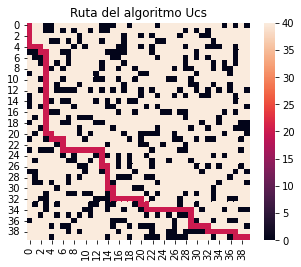

In [ ]:
plt.rcParams["figure.figsize"] = [5, 4]

fig, ax1 = plt.subplots(ncols=1)
ax1.set_title("Ruta del algoritmo Ucs")
sns.heatmap(pd.DataFrame(np.array(rutaUcs).reshape(n_filas, n_columnas)),ax=ax1)

plt.show()

#**Algoritmo Voraz**



In [ ]:
class Nodo2:
    
    def __init__(self, state='', parent=None, action=None, cost=1,recorrido = [0 for i in range(n_filas*n_columnas)]):
        self.state = state
        self.parent = parent
        self.action = action
        self.cost = cost
        self.recorrido  = recorrido

    def states_path(self):
        if self.parent == None:
            self.recorrido[self.state.index(2)] = 20
            return [self]
        self.recorrido[self.parent.state.index(2)] = 20
        self.recorrido[self.state.index(2)] = 20
        return self.parent.states_path() + [self]    
    
    def actions_path(self):
        if self.parent == None:
            return []
        return self.parent.actions_path() + [self.action]   

    def reiniciar_recorrido(self):
          self.recorrido =  [0 for i in range(n_filas*n_columnas)]          

    def __eq__(self, node):
       if node:
           return self.state == node.state
       return False    

    def path_cost(self):
        total_cost = 0
        if self.parent is None:
            return total_cost
        total_cost += self.cost + self.parent.path_cost()
        return total_cost 

    def __repr__(self):
       return self.state  

In [ ]:
distanciaEuclidiana = disEuclidiana() 

In [ ]:
class Tablero(Nodo2):
  def __repr__(self):
      columnas_str = n_columnas*"|{}"
      columnas_str= columnas_str+"|\n"
      return (n_filas * str(columnas_str)).format(*self.state).replace('0','-')

In [ ]:
caminoVoraz = [0 for i in range(n_filas*n_columnas)]
def Voraz(problem, fringe=PriorityQueue()):
    closed = []
    fringe.push(problem.initial, problem.h(problem.initial))
    
    while(True):
        node = fringe.pop()
        
        if problem.is_goal_2(node.state):
            caminoVoraz[node.state.index(2)]=20 
            return node,closed
        if node.state not in closed: 
            closed.append(node.state)
            caminoVoraz[node.state.index(2)]=20
            for child in expand(problem, node):
                fringe.push(child, problem.h(child)) 

In [ ]:
laberinto_recorrido = LaberintoRecorrido(Tablero(estadoInicial), Tablero(estadoFinal),)
nodos_expandidosVoraz=[]
try:
  solution, nodos_expandidosVoraz = Voraz(laberinto_recorrido)
  print('----------- Algoritmo Voraz -----------')
  print('Action sequence:', solution.actions_path())
  print('Costo:', laberinto_recorrido.g(solution))
  print("Total de Nodos Expandidos",len(nodos_expandidosVoraz))
  for board in solution.states_path():
   pass
except:
  print("Sin solucion")

----------- Algoritmo Voraz -----------
Action sequence: ['D', 'R', 'D', 'R', 'D', 'R', 'D', 'D', 'D', 'D', 'D', 'D', 'R', 'R', 'R', 'R', 'R', 'R', 'D', 'R', 'D', 'R', 'R', 'D', 'D', 'R', 'D', 'D', 'D', 'R', 'R', 'D', 'R', 'R', 'D', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D', 'D', 'D', 'L', 'D', 'D', 'D', 'R', 'D', 'D', 'R', 'R', 'D', 'R', 'D', 'R', 'D', 'R', 'D', 'R', 'R', 'D', 'D', 'R', 'D', 'R', 'D', 'R', 'D', 'R', 'D', 'D', 'R', 'R', 'D', 'R', 'D', 'R']
Costo: 80
Total de Nodos Expandidos 1226


In [ ]:
rutaVoraz = solution.recorrido.copy()
for i in range(len(caminoVoraz)):
  if(caminoVoraz[i]!=rutaVoraz[i]):
    if(caminoVoraz[i]==20):
      rutaVoraz[i]=40

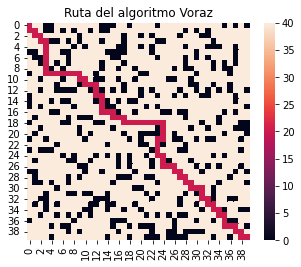

In [ ]:
plt.rcParams["figure.figsize"] = [5, 4]

fig, ax1 = plt.subplots(ncols=1)
ax1.set_title("Ruta del algoritmo Voraz")
sns.heatmap(pd.DataFrame(np.array(rutaVoraz).reshape(n_filas, n_columnas)),ax=ax1)

plt.show()

#**Algoritmo A***

In [ ]:
class Nodo3:
    
    def __init__(self, state='', parent=None, action=None, cost=1,recorrido = [0 for i in range(n_filas*n_columnas)]):
        self.state = state
        self.parent = parent
        self.action = action
        self.cost = cost
        self.recorrido  = recorrido

    def states_path(self):
        if self.parent == None:
            self.recorrido[self.state.index(2)] = 20
            return [self]
        self.recorrido[self.parent.state.index(2)] = 20
        self.recorrido[self.state.index(2)] = 20
        return self.parent.states_path() + [self]    
    
    def actions_path(self):
        if self.parent == None:
            return []
        return self.parent.actions_path() + [self.action]   

    def reiniciar_recorrido(self):
          self.recorrido =  [0 for i in range(n_filas*n_columnas)]          

    def __eq__(self, node):
       if node:
           return self.state == node.state
       return False    

    def path_cost(self):
        total_cost = 0
        if self.parent is None:
            return total_cost
        total_cost += self.cost + self.parent.path_cost()
        return total_cost 

    def __repr__(self):
       return self.state  

In [ ]:
distanciaEuclidiana = disEuclidiana()

In [ ]:
class Tablero(Nodo3):
  def __repr__(self):
      columnas_str = n_columnas*"|{}"
      columnas_str= columnas_str+"|\n"
      return (n_filas * str(columnas_str)).format(*self.state).replace('0','-')

In [ ]:
caminoA_estrella = [0 for i in range(n_filas*n_columnas)]
def A_estrella(problem, fringe=PriorityQueue()):
    fringe.push(problem.initial, 0 + problem.h(problem.initial))
    closed = []
   
    while(True):
        node = fringe.pop()
        if problem.is_goal_2(node.state): 
            caminoA_estrella[node.state.index(2)]=20
            return node,closed
        if node.state not in closed: 
            closed.append(node.state)
            caminoA_estrella[node.state.index(2)]=20
            for child in expand(problem, node):
                fringe.push(child, problem.g(child) + problem.h(child))     

In [ ]:
laberinto_recorrido = LaberintoRecorrido(Tablero(estadoInicial), Tablero(estadoFinal),)
nodos_expandidosA_estrella =[]
try:
  solution, nodos_expandidosA_estrella = A_estrella(laberinto_recorrido)
  print('----------- Algoritmo de A* -----------')
  print('Action sequence:', solution.actions_path())
  print('Costo:', laberinto_recorrido.g(solution))
  print("Total de Nodos Expandidos",len(nodos_expandidosA_estrella))
  for tablero in solution.states_path():
      pass
except:
  print("Sin solucion")

----------- Algoritmo de A* -----------
Action sequence: ['D', 'R', 'D', 'R', 'D', 'R', 'D', 'D', 'D', 'D', 'D', 'D', 'R', 'R', 'R', 'R', 'R', 'R', 'D', 'R', 'D', 'R', 'R', 'D', 'D', 'R', 'D', 'D', 'D', 'R', 'R', 'D', 'R', 'R', 'D', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D', 'D', 'D', 'R', 'D', 'D', 'D', 'R', 'D', 'D', 'D', 'R', 'D', 'R', 'D', 'R', 'D', 'R', 'R', 'D', 'D', 'R', 'D', 'R', 'D', 'R', 'D', 'R', 'D', 'D', 'R', 'R', 'D', 'R', 'D', 'R']
Costo: 78
Total de Nodos Expandidos 1226


In [ ]:
A_estrella = solution.recorrido.copy()
for i in range(len(caminoA_estrella)):
  if(caminoA_estrella[i]!=A_estrella[i]):
    if(caminoA_estrella[i]==20):
      A_estrella[i]=40

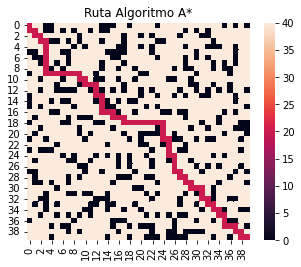

In [ ]:
plt.rcParams["figure.figsize"] = [5, 4]

fig, ax1 = plt.subplots(ncols=1)
ax1.set_title("Ruta Algoritmo A*")
sns.heatmap(pd.DataFrame(np.array(A_estrella).reshape(n_filas,n_columnas)),ax=ax1)

plt.show()